In [3]:
import cv2
import numpy as np
import sys

In [ ]:
img = cv2.imread("./fig/puppy.bmp")

if img is None:
    print('image read failed')
    sys.exit()

cv2.namedWindow('image', cv2.WINDOW_NORMAL)
cv2.imshow('image', img)

while True:
    key = cv2.waitKey()
    
    if key == 27 or key == ord('q'):
        break

cv2.destroyAllWindows()

In [7]:
cap = cv2.VideoCapture(0)


if not cap.isOpened():
    print('video open failed')
    sys.exit()
    

w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS)*0.8)
fourcc = cv2.VideoWriter_fourcc(*'DIVX')


out = cv2.VideoWriter('output.avi', fourcc, fps, (w, h))
while True:
    
    ret, frame = cap.read()
    
    if not ret:
        print('frame open failed')
        break
    
    edge = cv2.Canny(frame, 50, 150)
    
    out.write(frame)
    
    cv2.imshow('image', frame)
    cv2.imshow('edge', edge)
    
    
    if cv2.waitKey(20) == 27:
        break
        

cap.release()
cv2.destroyAllWindows()

In [ ]:
img = cv2.imread('../Ch_1_Opencv_Intro/fig/puppy.bmp', 0)

if img is None:
    print('image read failed')
    sys.exit()
    
    
cv2.namedWindow('image', cv2.WINDOW_NORMAL)
cv2.imshow('image', img)

while True:
    key == cv2.waitKey()
    
    if key == ord('i'):
        img = 255 - img
        cv2.imshow('image', img)
    
    elif key == ord('e'):
        img = cv2.Canny(img, 50, 150)
        cv2.imshow('image', img)
        
    elif key == 27:
        break


cv2.destroyAllWindows()

In [6]:
def call_mouse(event, x, y, flags, param):
    global oldx, oldy
    
    if event == cv2.EVENT_LBUTTONDOWN:
        print(x,y)
    
    elif event == cv2.EVENT_MOUSEMOVE:
        flags == cv2.EVENT_FLAG_BUTTON:
            cv2.line(img, (oldx, oldy),(x,y),(0,0,255), 10, cv2.LINE_AA)
            cv2.imshow('image', img)
img = np.ones((600, 1200, 3), np.uint8)*255

cv2.imshow('image', img)
cv2.setMouseCallback('image', call_mouse, img)

cv2.waitKey()

cv2.destroyAllWindows()

325 135
325 135


In [ ]:
def call_mouse(event, x, y, flags, param):
    global oldx, oldy
    
    if event == cv2.EVENT_LBUTTONDOWN:
        oldx, oldy = x, y
        
    elif event == cv2.EVENT_MOUSEMOVE:
        if flags == cv2.EVENT_FLAG_LBUTTON:
            cv2.line(img, (oldx, oldy), (x, y), (0, 0, 255), 10, cv2.LINE_AA)
            cv2.imshow('image', img)
            oldx, oldy = x, y


img = np.ones((600, 1200, 3), np.uint8)*255

cv2.imshow('image', img)
cv2.setMouseCallback('image', call_mouse, img)

cv2.waitKey()

cv2.destroyAllWindows()

In [10]:
def call_track(pos):
    img[:] = np.round(img1*(pos/255),0).astype(np.uint8)
    cv2.imshow('image', img)

img = cv2.imread('./fig/puppy.bmp',0)

img1 = img.copy()

cv2.imshow('image', img)
cv2.createTrackbar('Level', 'image', 0, 255, call_track)

cv2.waitKey()

cv2.destroyAllWindows()

In [ ]:
# ============================================================================

In [16]:
tm = cv2.TickMeter()

src= cv2.imread('./fig/puppy.bmp',0)

tm.start()

img_blur = cv2.GaussianBlur(src, (0,0), 3)
tm.stop()

print(tm.getTimeMilli(), 'ms')

cv2.imshow('image', img)
cv2.imshow('image_blur', img_blur)

cv2.waitKey()

cv2.destroyAllWindows()

7.2519 ms


In [22]:
src = cv2.imread('./lenna.bmp')

# dst = np.clip(src + 100., 0, 255).astype(np.uint8)
dst = cv2.add(src, (100,100,100,0))

if src is None:
    print('image read failed')
    sys.exit()
    
cv2.imshow('src', src)
cv2.imshow('src+100', dst)

cv2.waitKey()

cv2.destroyAllWindows()

In [24]:
import matplotlib.pyplot as plt

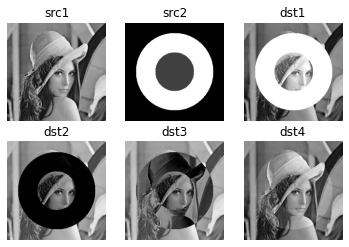

In [31]:
src1 = cv2.imread('./lenna256.bmp', 0)
src2 = np.zeros((256, 256), np.uint8)

cv2.circle(src2, (128, 128), 100, 200, -1)
cv2.circle(src2, (128, 128), 50, 50, -1)

dst1 = cv2.add(src1, src2)
dst2 = cv2.subtract(src1, src2)
dst3 = cv2.absdiff(src1, src2)
dst4 = cv2.addWeighted(src1, 0.9, src2, 0.1, 0)

plt.subplot(231), plt.imshow(src1,cmap="gray"), plt.axis('off'), plt.title('src1')
plt.subplot(232), plt.imshow(src2,cmap="gray"), plt.axis('off'), plt.title('src2')
plt.subplot(233), plt.imshow(dst1,cmap="gray"), plt.axis('off'), plt.title('dst1')
plt.subplot(234), plt.imshow(dst2,cmap="gray"), plt.axis('off'), plt.title('dst2')
plt.subplot(235), plt.imshow(dst3,cmap="gray"), plt.axis('off'), plt.title('dst3')
plt.subplot(236), plt.imshow(dst4,cmap="gray"), plt.axis('off'), plt.title('dst4')
plt.show()

# cv2.imshow('src1', src1)
# cv2.imshow('src2', src2)
# cv2.imshow('dst1', dst1)
# cv2.imshow('dst2', dst2)
# cv2.imshow('dst3', dst3)
# cv2.imshow('dst4', dst4)

cv2.waitKey()

cv2.destroyAllWindows()

In [14]:
img1 = cv2.imread('./fig2/puppy.bmp')
img2 = cv2.imread('./fig2/puppy_sunglass.bmp')

for i in range(101):
    alpha= i*0.01          #천천히 늘어나게함

    dst = cv2.addWeighted(img2, alpha, img1, 1-alpha, 0)   #i를 겹침

    cv2.imshow('image', dst)

    if cv2.waitKey(50) == 27:
        break

    if i == 100:
        cv2.waitKey()

# cv2.imshow('img', img)
# cv2.imshow('img2', img2)


cv2.destroyAllWindows()

In [13]:
src1 = np.zeros((256,256), np.uint8)
src2 = np.zeros((256,256), np.uint8)

cv2.rectangle(src1, (10,10), (127,250), 255, -1)
cv2.circle(src2, (128,128), 100, 255, -1)

bit_and = cv2.bitwise_and(src1,src2)
bit_or = cv2.bitwise_or(src1,src2)
bit_xor = cv2.bitwise_xor(src1, src2)
bit_not = cv2.bitwise_not(src1)

cv2.imshow('src1', src1)
cv2.imshow('src2', src2)
cv2.imshow('bit_and', bit_and)
cv2.imshow('bit_or', bit_or)
cv2.imshow('bit_xor', bit_xor)
cv2.imshow('bit_not', bit_not)

cv2.waitKey()
cv2.destroyAllWindows()

In [11]:
src = cv2.imread('./flowers.jpg')
src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

b,g,r = cv2.split(src)
h,s,v = cv2.split(src_hsv)

# src_merge = cv2.merge((b,g,r))

cv2.imshow('src',src)
cv2.imshow('src_merge', src_merge)

cv2.imshow('b',b)
cv2.imshow('g',g)
cv2.imshow('r',r)

cv2.imshow('h',h)
cv2.imshow('s',s)
cv2.imshow('v',v)

cv2.waitKey()
cv2.destroyAllWindows()